In [1]:
import pandas as pd 
import torch 
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader 
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt 

In [2]:
# Set random seeds for reproducibility 
torch.manual_seed(42)

In [3]:
df = pd.read_csv("/home/subhamchakraborty/Default_download/pytorch_practice/fmnist_small.csv")
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


In [4]:
df.shape

(6000, 785)

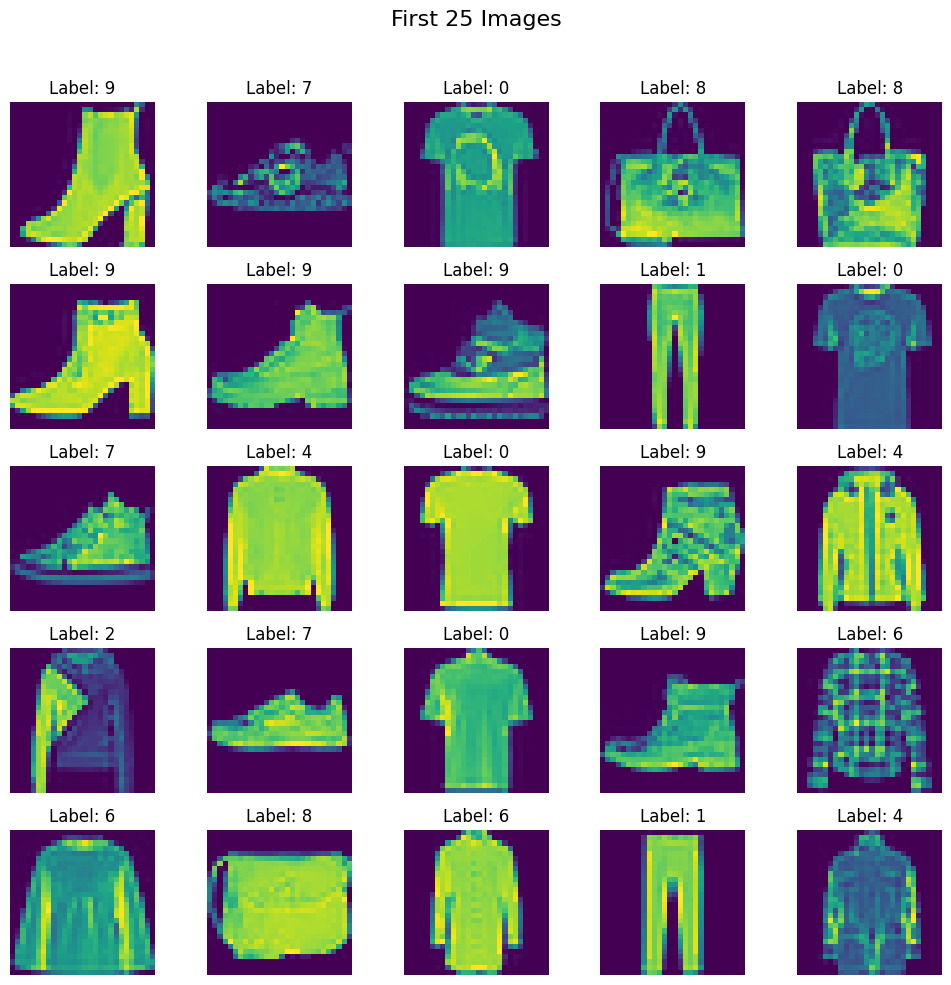

In [7]:
## Create a 4 x 4 grid of images 

fig, axes = plt.subplots(5, 5, figsize = (10, 10))
fig.suptitle("First 25 Images", fontsize = 16)

# Plot the first 16 images from the dataset 
for i, ax in enumerate(axes.flat):
    img = df.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

In [8]:
## Train test split  

X = df.iloc[:,1:].values
y = df.iloc[:, 0].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [10]:
## Scaling the features 

X_train = X_train / 255.0
X_test = X_test/ 255.0

In [11]:
X_train, X_test

(array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.0627451, 0.       ,
         0.       ]]),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.00392157, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ...

In [13]:
### Create CustomDataset class 

class CustomDataset(Dataset):

    def __init__(self, features, labels):

        self.features = torch.tensor(features, dtype = torch.float32) 
        self.labels = torch.tensor(labels, dtype = torch.long)

    def __len__(self):
        
        return len(self.features)
    
    def __getitem__(self, index):
        return self.features[index], self.labels[index]


In [20]:
### Create Train Dataset object 

train_dataset = CustomDataset(X_train, y_train)

In [21]:
len(train_dataset)

4800

In [22]:
train_dataset[0]

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [23]:
### Create Test Dataset Object 

test_dataset = CustomDataset(X_test, y_test)

In [24]:
### Create Train and Test Dataloader 

train_loader = DataLoader(train_dataset, batch_size=32, shuffle = True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle = True)

In [32]:
### Define NN class 

class MyNN(nn.Module):

    def __init__(self, num_features):

        super().__init__()
        self.model = nn.Sequential(

            nn.Linear(num_features,128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10) 
            ## No need to add softmax activation funtion. Because, in case of Pytorch, for Binary cross entropy loss (BCE), softmax already in-built incorporated 
        )
    
    def  forward(self, x):

        return self.model(x)

In [33]:
### Set Learning rate and epochs 

learning_rate  = 0.1
epochs = 100

In [34]:
### Instantiate the model

model = MyNN(X_train.shape[1])

### Loss Function  

criterion = nn.CrossEntropyLoss()

### Optimizer 

optimizer = optim.SGD(model.parameters(), lr = learning_rate)

In [37]:
len(train_loader)

150

In [38]:
### Training Loop 

for epoch in range(epochs):

    total_epoch_loss = 0

    for batch_features, batch_labels in train_loader:

        # Forward Pass: 

        outputs  = model(batch_features)
        # Calculate Loss 

        loss = criterion(outputs, batch_labels)

        # Backward pass 
        optimizer.zero_grad()
        loss.backward()

        # Update gradients 
        optimizer.step()

        total_epoch_loss = total_epoch_loss + loss.item()

    avg_loss = total_epoch_loss/len(train_loader)
    print(f"Epoch:{epoch+1},Loss:{avg_loss}")

Epoch:1,Loss:0.2906220157444477
Epoch:2,Loss:0.2785008944819371
Epoch:3,Loss:0.26706614886720975
Epoch:4,Loss:0.25720042273402216
Epoch:5,Loss:0.24984353716174762
Epoch:6,Loss:0.2438220590601365
Epoch:7,Loss:0.22721866331994534
Epoch:8,Loss:0.23076790817081927
Epoch:9,Loss:0.2139568694929282
Epoch:10,Loss:0.21646399942537148
Epoch:11,Loss:0.21077697965006034
Epoch:12,Loss:0.18682272554685672
Epoch:13,Loss:0.19111216860512892
Epoch:14,Loss:0.18845500943561394
Epoch:15,Loss:0.18723862218360107
Epoch:16,Loss:0.17758673219631116
Epoch:17,Loss:0.17407078663508097
Epoch:18,Loss:0.1661702268322309
Epoch:19,Loss:0.17363543827086686
Epoch:20,Loss:0.1483743069662402
Epoch:21,Loss:0.14475897970298926
Epoch:22,Loss:0.15585792647053798
Epoch:23,Loss:0.13861918915528804
Epoch:24,Loss:0.1460750934605797
Epoch:25,Loss:0.13399007198090354
Epoch:26,Loss:0.12964537458183864
Epoch:27,Loss:0.12110914592941602
Epoch:28,Loss:0.11322530111297965
Epoch:29,Loss:0.13522748264794549
Epoch:30,Loss:0.11528198310484

In [39]:
### Set model to eval mode 

model.eval()


MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [40]:
len(test_loader)

38

In [41]:
### Evaluation code 

total = 0
correct = 0

with torch.no_grad():

    for batch_features, batch_labels in test_loader:

        outputs = model(batch_features)

        _,predicted = torch.max(outputs,1)

        total = total + batch_labels.shape[0]

        correct = correct + (predicted == batch_labels).sum().item()

print(f"Accuracy:{correct/total}")

Accuracy:0.8316666666666667


In [42]:
### How to improve this accuracy value? 

# 1. Use full dataset (70000 images) --> Use GPU 
# 2. Use different optimizers 
# 3. Use different learning rate 
# 4. Use more epochs 
# 5. Use different weight initialization strategies 
# 6. Use different regularization methods 
# 7. Use dropouts 
# 8. Use batch normalization methods 
# 9. Change Architectures using hyperparamete tunning 